<font size="6">Homework 3</font><br/><font size="5">Ali Abbasi<br/> 98105879</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
# load boston dataset
boston_dataset = load_boston()
boston_dataset.keys()

C:\Program Files\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
# creating dataframe from dataset
boston_dataframe = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# adding target values (MEDV) to dataframe
boston_dataframe['MEDV'] = boston_dataset['target']
boston_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<font size="6">Part 1</font>

In [5]:
boston_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<div dir='rtl'>
همانطور که مشاهده می‌شود، مقادیر missing نداریم و دیتاستمان کامل است.
</div>

In [6]:
# splitting data to training and test
mask = np.random.rand(len(boston_dataframe)) <= 0.8
training_data = boston_dataframe[mask]
testing_data = boston_dataframe[~mask]

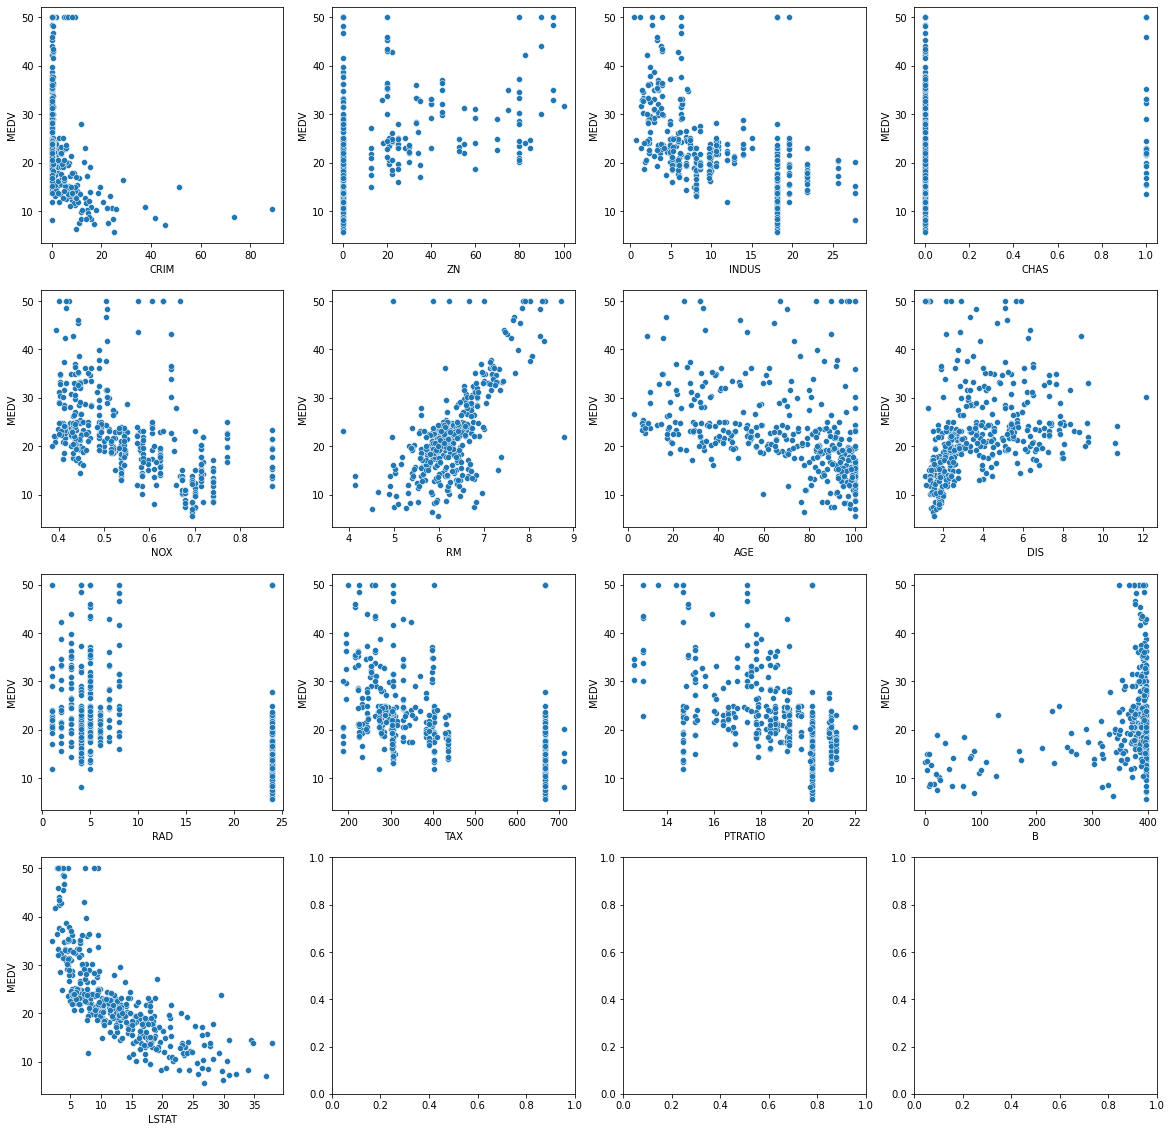

In [7]:
# plotting MEDV vs other features scatterplots
fig, axes = plt.subplots(4,4, figsize=(20, 20))
axes = axes.flatten()
for i in range(13):
    col = training_data.columns[i]
    # axes[i].set_title(col)
    sns.scatterplot(data=training_data, x=col, y='MEDV', ax=axes[i])

<AxesSubplot:>

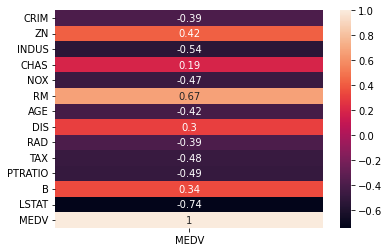

In [8]:
# plotting correlation of MEDV with other features
sns.heatmap(training_data.corr()['MEDV'].to_frame(), annot=True)

<div dir='rtl'>
معنی نام هر کدام از ستون‌ها به شرح زیر است:
</div>
<div>
CRIM: Per capita crime rate by town </br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft</br>
INDUS: Proportion of non-retail business acres per town</br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</br>
NOX: Nitric oxide concentration (parts per 10 million)</br>
RM: Average number of rooms per dwelling</br>
AGE: Proportion of owner-occupied units built prior to 1940</br>
DIS: Weighted distances to five Boston employment centers</br>
RAD: Index of accessibility to radial highways</br>
TAX: Full-value property tax rate per $10,000</br>
PTRATIO: Pupil-teacher ratio by town</br>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town</br>
LSTAT: Percentage of lower status of the population</br>
MEDV: Median value of owner-occupied homes in $1000s</br>
</div>

<div dir='rtl'>
با مشاهده‌ی نمودار heatmap، می‌بینیم ستون MEDV کمترین هم‌بستگی را با ستون‌های DIS و CHAS دارد و بیشترین همبستگی را با ستون‌های RM و LSTAT (هم‌بستگی منفی) دارند. هم‌چنین با اکثر موارد دیگر نیز هم‌بستگی قابل توجهی دارد. دلیل آن این است که این موارد، ویژگی‌های خانه/محله/شهر مربوط به خانه‌ها هستند و بنابراین بر روی قیمت خانه تاثیرگذار هستند.
</div>

<div dir='rtl'>
 همانطور که در تعاریف بالا می‌بینیم، MEDV میانه‌ی قیمت خانه‌های تحت سکونت صاحب‌خانه، RM میانگین تعداد اتاق در هر خانه و LSTAT درصد جمعیت با رفاه اجتماعی پایین‌تر را نشان می‌دهد. </br>
هم‌بستگی‌های به دست آمده را می‌‌توان در scatterplotها نیز به صورت شهودی مشاهده کرد. </br>
همانطور که می‌بینیم، ستون MEDV با ستون RM رابطه‌ی نسبتا خطی و مستقیمی دارند و با افزایش یکی، دیگری نیز افزایش می‌یابد؛ زیرا هرچه یک خانه تعداد اتاق بیشتری داشته باشد گران‌تر خواهد بود. هم‌چنین رابطه با ستون LSTAT نیز همانطور که پیش‌بینی می‌شد، به صورت تقریبا خطی و با شیب منفی است؛ که دلیل آن این است که هر چه درصد بیشتری از افراد محله/شهر فقیرتر باشند، احتمالا خانه‌های آن منطقه ارزان‌تر خواهد بود.
</br>
در بقیه‌ی موارد، هم‌بستگی‌ها کمتر است و رابطه‌ی آن‌ها با MDEV به خوبی این دو متغیر دیده نمی‌شود. اما می‌توانیم میزان هم بستگی آن‌ها را در heatmap مشاهده کنیم و به طور مشابه با توجه به معنی این متغیر، دلیل این هم‌بستگی را هم متوجه شویم.

</div>

<font size="6">Part 2</font>

In [9]:
# function to calculate phi matrix for a dataframe with approach 1
# assuming y = w0 + w1 * x1 + ... + w13 * x13
def get_phi_matrix1(df):
    phi_matrix = df.drop(columns=['MEDV'], errors='ignore')
    phi_matrix.insert(0, 'bias', 1)
    return phi_matrix

In [10]:
# function to calculate W_ML parameters and predicted values for a phi matrix and real values of a column
# this function uses pseudo inverse of phi matrix to calculate W_ML parameters
def get_parameters_and_predicted_values(phi_matrix, real_values):
    parameters = np.dot(np.linalg.pinv(phi_matrix), real_values)
    predicted_values = np.dot(phi_matrix, parameters)
    return parameters, predicted_values

In [11]:
# function to plot y_columns based on x_columns
def plot_cols_against_cols(x_cols, y_cols, df):
    fig, axes = plt.subplots(len(x_cols), len(y_cols), figsize=(20, 20))
    for i, x_col in enumerate(x_cols):
        for j, y_col in enumerate(y_cols):
            sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i][j])

def plot_cols_against_cols_jointly(x_cols, y_cols, df):
    fig, axes = plt.subplots(1, len(x_cols), figsize=(20, 10))
    for i, x_col in enumerate(x_cols):
        for y_col in y_cols:
            sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i], alpha=0.5, label=y_col)
        plt.legend()

In [12]:
# calculating phi matrix and predicted values with approach one
phi_matrix = get_phi_matrix1(training_data)
parameters, predicted_values = get_parameters_and_predicted_values(phi_matrix, training_data['MEDV'])
parameters

array([ 3.89415756e+01, -1.05374831e-01,  4.64584813e-02, -1.94239985e-02,
        3.97263827e+00, -1.92546451e+01,  3.39489270e+00,  9.59626086e-04,
       -1.53175234e+00,  3.10174537e-01, -1.16628946e-02, -9.13702884e-01,
        1.03042252e-02, -5.18700134e-01])

In [13]:
reg_df = training_data.copy()
reg_df['predicted values'] = predicted_values
reg_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted values
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,29.877338
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,24.919740
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.104978
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.389309
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.683041


<div dir='rtl'>
با توجه به اینکه کمی نمودار خواسته شده گنگ است، برای اطمینان هرجا که نمودار خواسته شده سه نمودار رسم می‌کنم. یک بار نمودار MEDV و predicted value را بر حسب featureهای گفته شده رسم کردیم و یکبار هم برای راحتی بیشتر مقایسه، هردوی مقادیر MEDV و Predicted value را در یک گراف رسم کرده‌ایم. هم‌چنین نمودار Predicted values بر حسب MEDV را در انتها رسم می‌کنیم که هرچه خطی‌تر باشد، نشان‌دهنده‌ی این است که رگرسیون ما بهتر عمل می‌کند.

</div>

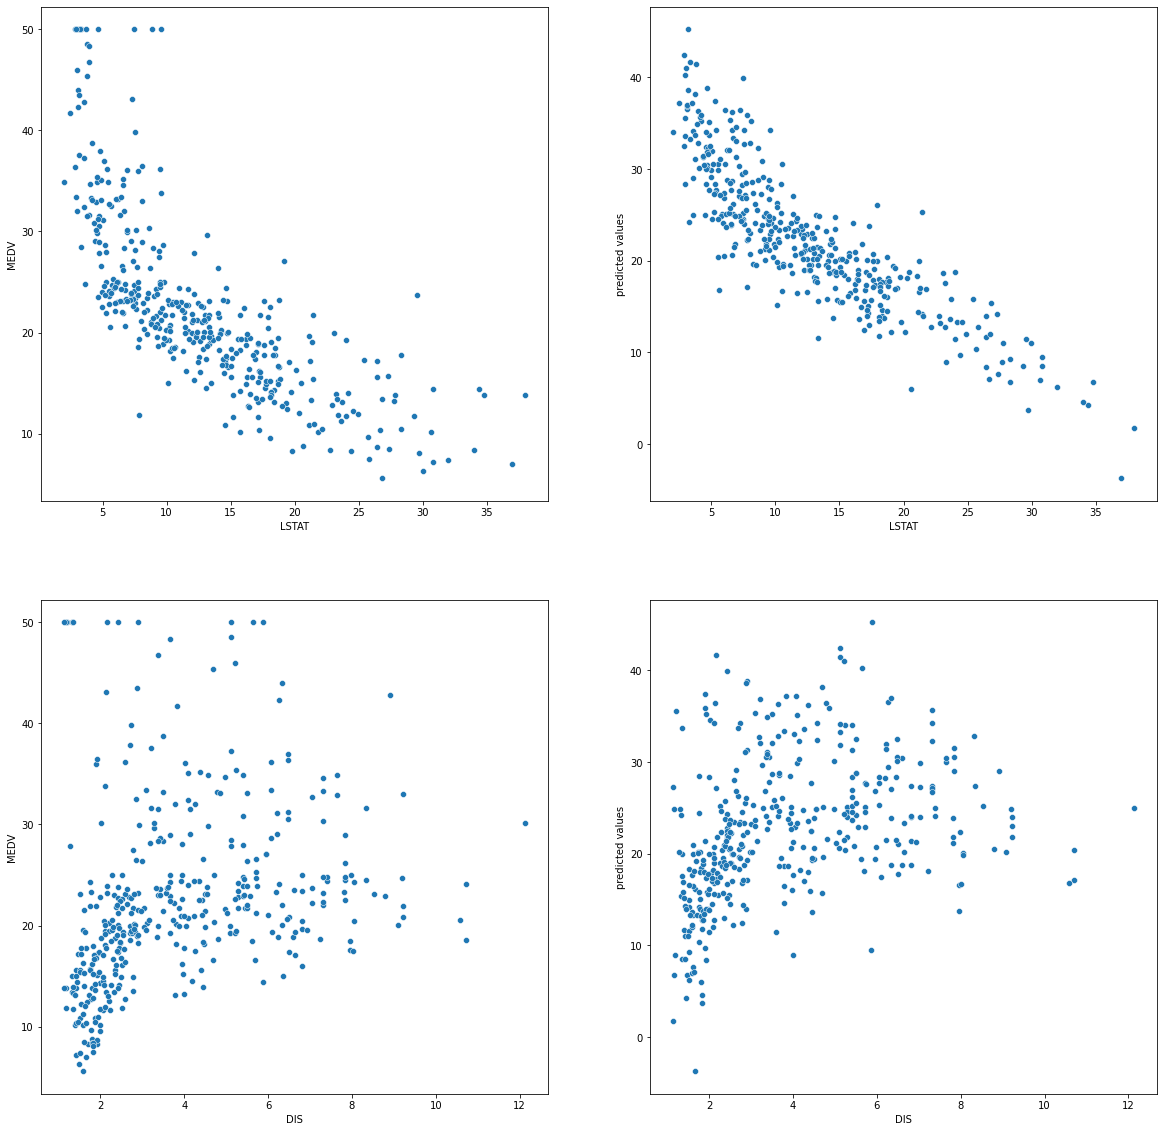

In [14]:
# here we plot MEDV and our predicted values separately based on LSTAT and DIS columns
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df)

No handles with labels found to put in legend.


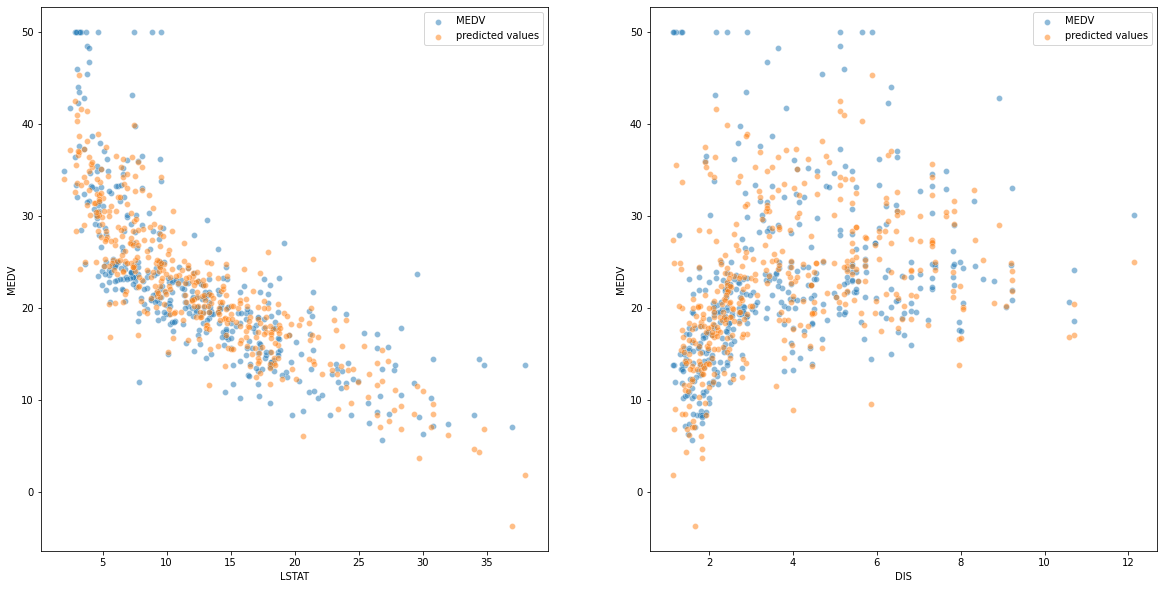

In [15]:
# for more clarification we plot MEDV and our predicted values based on LSTAT and DIS columns on the same graph:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df)

<AxesSubplot:xlabel='MEDV', ylabel='predicted values'>

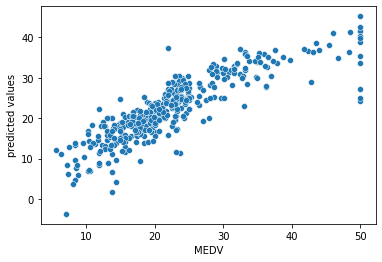

In [16]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=reg_df, x='MEDV', y='predicted values')

<div dir='rtl'>
با استفاده Linear basis function پارامترهای این رگرسیون را محاسبه کردیم و مقادیر predicted values را محاسبه کردیم. که از نمودارهای بالا می‌توانیم ببینیم که predicted values دقت نسبتا خوبی دارند.
</div>

<font size="6">Part 3</font>

In [17]:
# function to calculate phi matrix for a dataframe with approach 2
# assuming y = w0 + w1 * x1 + ... + w13 * x13 + w14 * x1^2 + ... w26 * x13^2
def get_phi_matrix2(df):
    tmp = df.drop(columns=['MEDV'], errors='ignore')
    phi_matrix2 = pd.concat([tmp, tmp ** 2], axis=1)
    phi_matrix2.insert(0, 'bias', 1)
    return phi_matrix2

In [18]:
# calculating phi matrix and predicted values with approach 2
phi_matrix2 = get_phi_matrix2(training_data)
parameters2, predicted_values2 = get_parameters_and_predicted_values(phi_matrix2, training_data['MEDV'])
parameters2

array([ 1.53385703e+02, -3.90953367e-01, -6.91619729e-02, -3.92940773e-01,
        1.81961884e+00, -1.93261778e+01, -1.73871556e+01, -2.93656279e-02,
       -2.43322883e+00,  8.20408433e-01, -2.63433229e-02, -4.81302778e+00,
        2.40165278e-02, -1.34164194e+00,  3.23588003e-03,  8.28442447e-04,
        1.44775634e-02,  1.81961884e+00, -2.84726337e+00,  1.54619808e+00,
        2.77300747e-04,  1.16499157e-01, -1.48949256e-02,  1.60797578e-05,
        1.13399256e-01, -4.04818662e-05,  2.22079851e-02])

In [19]:
reg_df2 = training_data.copy()
reg_df2['predicted values'] = predicted_values2
reg_df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted values
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.485827
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,23.086553
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,31.100745
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.292302
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,30.146528


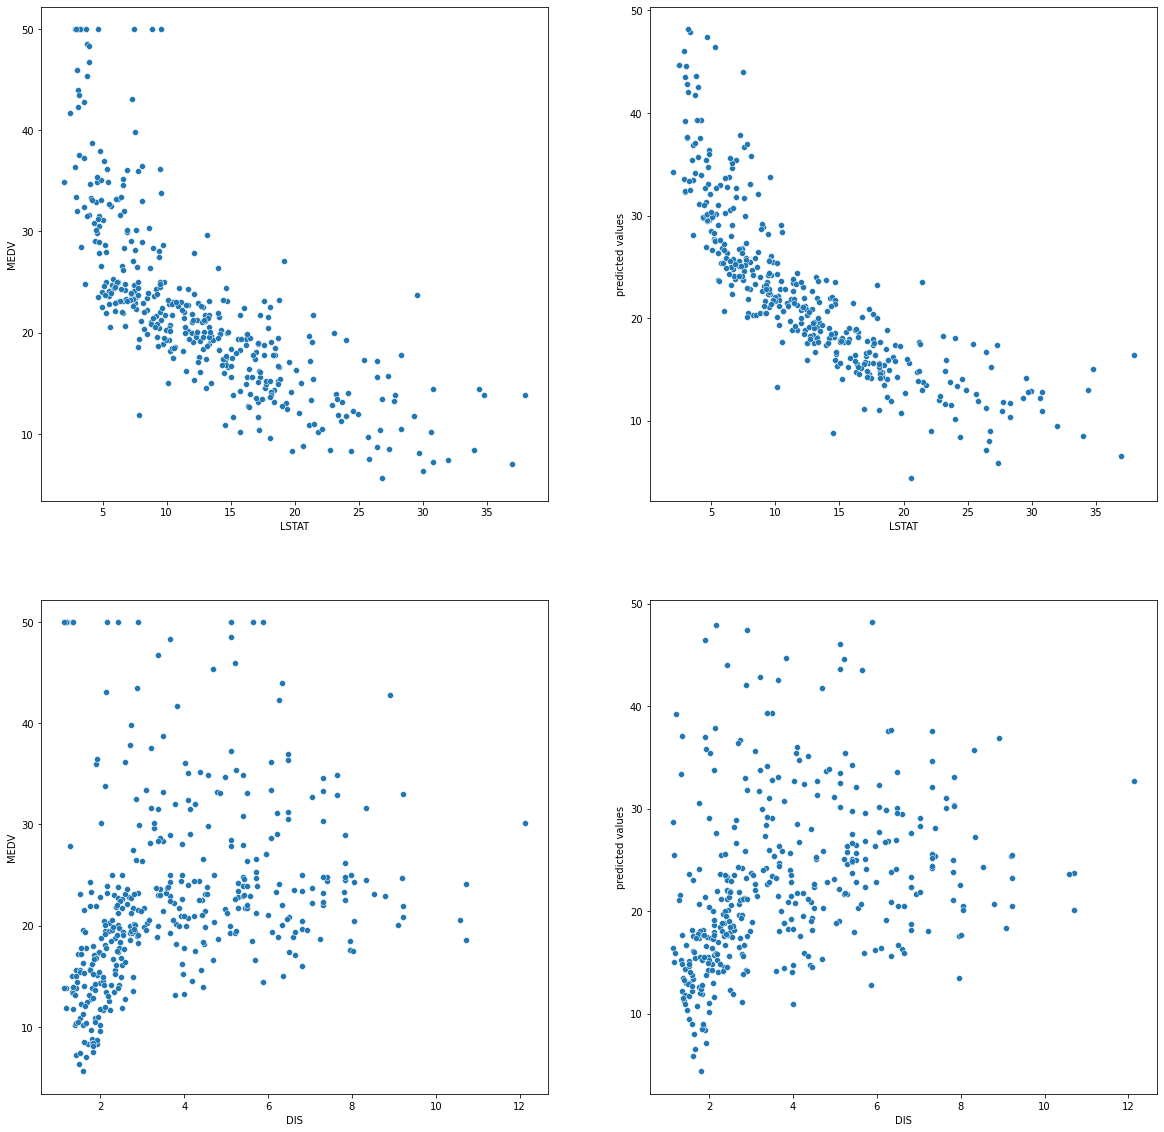

In [20]:
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df2)

No handles with labels found to put in legend.


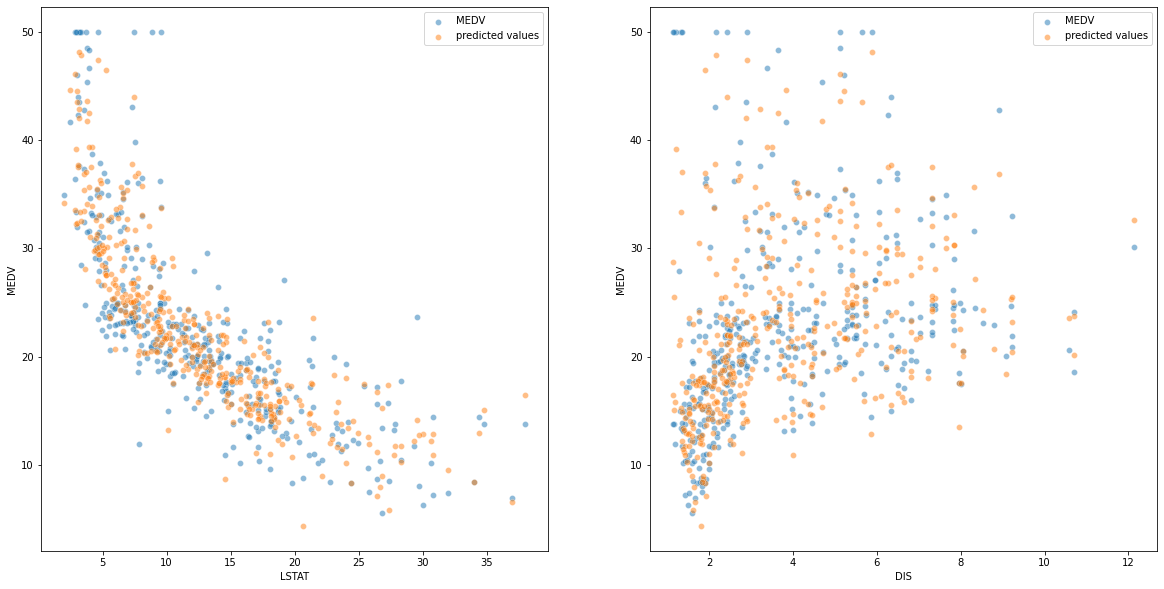

In [21]:
# for more clarification we plot MEDV and our predicted values based on LSTAT and DIS columns on the same graph:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df2)

<AxesSubplot:xlabel='MEDV', ylabel='predicted values'>

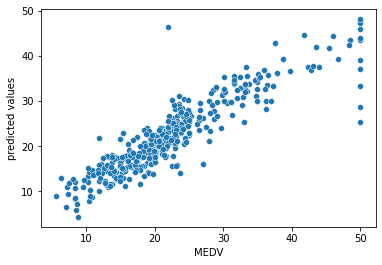

In [22]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=reg_df2, x='MEDV', y='predicted values')

<div dir='rtl'>
در این بخش با در نظر گرفتن مقادیر second order ستون‌ها، مدلمان پیچیدگی بیشتری دارد و همانطور که انتظار می‌رفت، مقادیر predicted values به مقادیر واقعی نزدیک‌تر شده‌اند.
</div>

<font size="6">Part 5</font>

<div dir='rtl'>
در این روش به کمک gaussian basis function می‌خواهیم رگرسیون را محاسبه کنیم. اما همانطور که در ادامه می‌بینید، پارامتر s=1 مناسب نیست و باید چاره‌ی دیگری بیندیشیم. (دقت کنید که علامت منفی در تابع موجود در صورت سوال جا افتاده است)
</div>

In [23]:
def gaussian_basis(x, miu, s = 1):
    return np.exp(-np.linalg.norm(np.subtract(x, miu), ord=2) ** 2 / (2 * s * s))

def gaussian_basis_vector(x, mius, s = 1): 
    return pd.Series([gaussian_basis(x, mius.iloc[i], s) for i in range(10)])

In [24]:
# calculating phi matrix and predicted values with approach 3
# assuming y = w0 + w1 * φ1(x) + ... w10 * φ10(x)
def get_phi_matrix3(df, s=1):
    df = df.drop(columns='MEDV', errors='ignore')
    phi_matrix3 = df.apply(lambda x: gaussian_basis_vector(x, random_mius, s), axis=1)
    phi_matrix3.insert(0, 'bias', 1)
    return phi_matrix3

In [25]:
# getting 10 random rows of training data as "miu"s for basis functions
random_mius = training_data.drop(columns='MEDV', errors='ignore').sample(10, replace=False)

In [26]:
phi_matrix3 = get_phi_matrix3(training_data)
phi_matrix3.head()

,bias,0,1,2,3,4,5,6,7,8,9
0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.813793e-131,0.0,0.0,2.578584e-135
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00


<div dir='rtl'>
همانطور که می‌بینید اکثر درایه‌های phi matrix صفر خواهند شد. دلیل آن این است که در فرمول basis function، مقدار توان بسیار بزرگ (و منفی) خواهد بود و در نتیجه اکثر درایه‌ها صفر می‌شوند. این موضوع باعث می‌شود رگرسیون ما خیلی بد عمل کند که این نتیجه را در پایین می‌توانیم ببینیم:
</div>

In [27]:
# calculating parameters and predicted_values using approach 3
parameters3, predicted_values3 = get_parameters_and_predicted_values(phi_matrix3, training_data['MEDV'])
parameters3 #W_ML values

array([ 22.49115789,   7.30884211,  -7.29115789,  -4.7127254 ,
        13.50884211, -13.99115789,   0.60884211,   9.00887835,
         0.10884211,  -1.29115789,  -2.89085719])

In [28]:
reg_df3 = training_data.copy()
reg_df3['predicted values'] = predicted_values3
reg_df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted values
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,22.491158
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,22.491158
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,22.491158
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,22.491158
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,22.491158


No handles with labels found to put in legend.


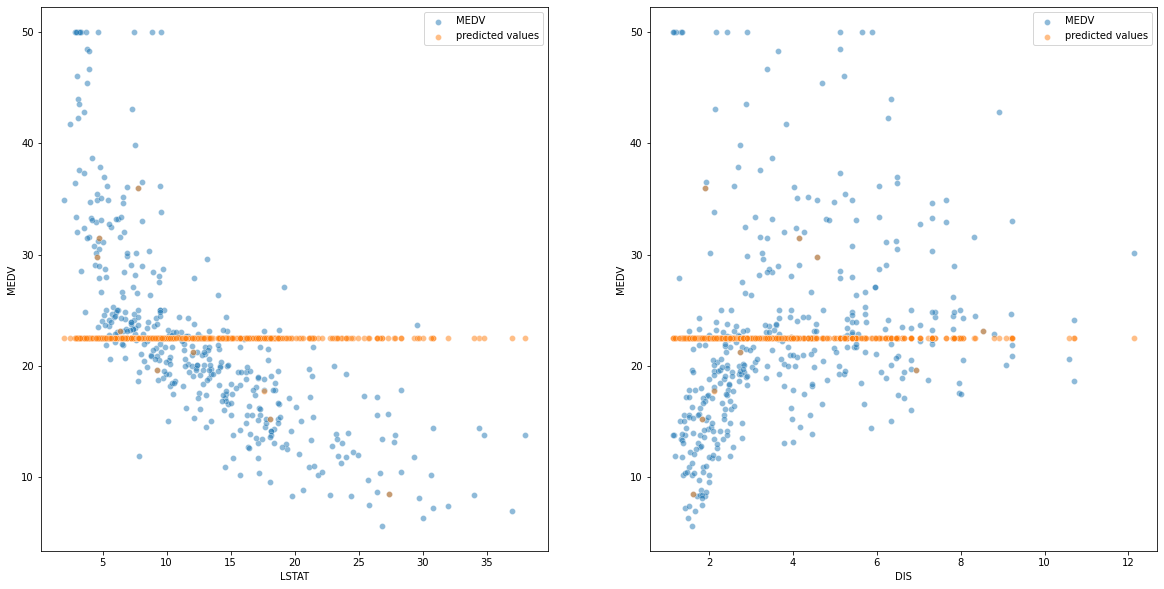

In [29]:
# plot MEDV and our predicted values based on LSTAT and DIS columns on the same graph:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df3)

<div dir='rtl'>
همانطور که مشاهده می‌شود، رگرسیون ما به این صورت تنها می‌تواند مقدار میانگین داده‌ها را خروجی دهد. برای حل این مشکل، باید راه‌کاری پیدا کنیم که مقدار توان exp در gaussian basis function مقدار خیلی بزرگی نگیرد. برای این منظور می‌توان از نرمال کردن ستون‌ها استفاده کرد یا این که مقدار s را بزرگ‌تر کرد یا راهکارهای دیگری اندیشید. من این دو راهکار گفته شده را امتحان کردم و بزرگ‌تر کردن s بهتر عمل می‌کرد. بنابراین در اینجا نیز از آن استفاده می‌کنم.
</br>
در اینجا s را برابر با ۱۰۰ قرار می‌دهیم:
</div>

In [30]:
phi_matrix3 = get_phi_matrix3(training_data, s=100)
parameters3, predicted_values3 = get_parameters_and_predicted_values(phi_matrix3, training_data['MEDV'])
reg_df3 = training_data.copy()
reg_df3['predicted values'] = predicted_values3

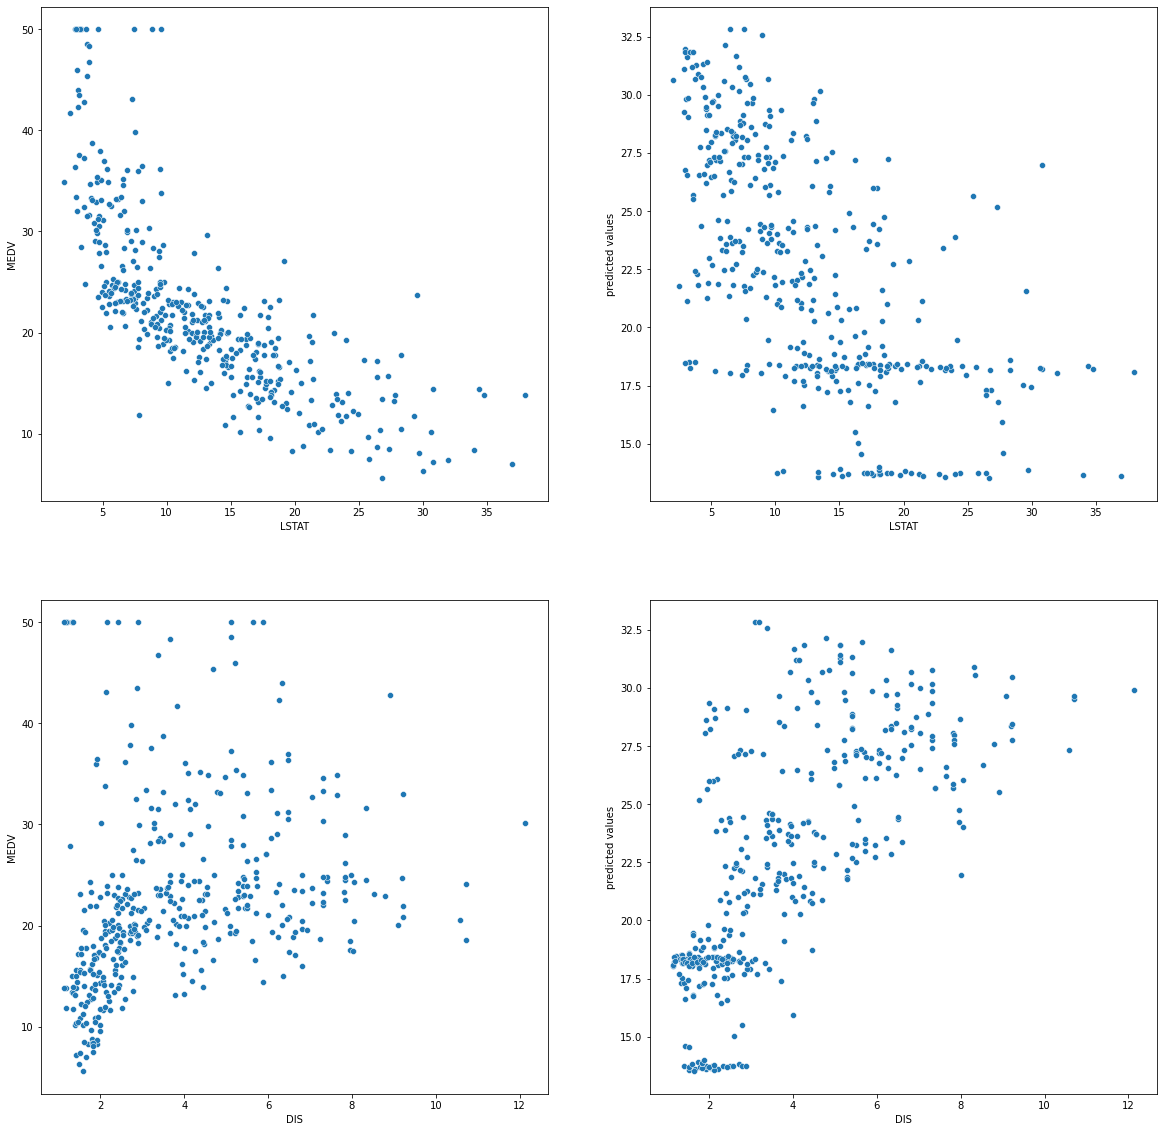

In [31]:
# plot MEDV and our predicted values based on LSTAT and DIS columns seperately:
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df3)

No handles with labels found to put in legend.


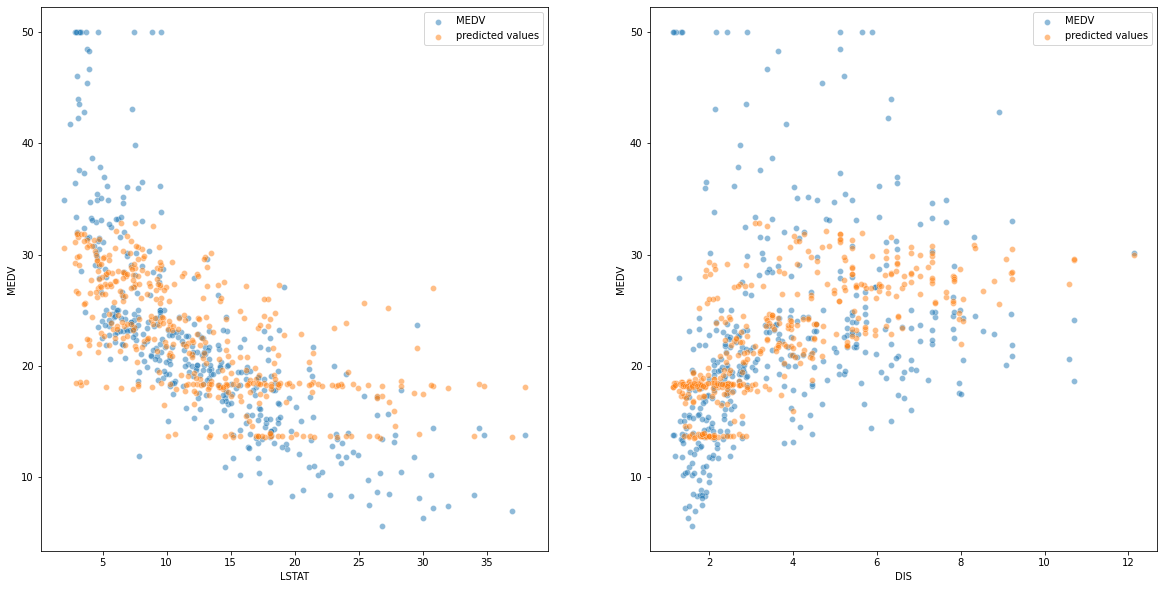

In [32]:
# plot MEDV and our predicted values based on LSTAT and DIS columns on the same graph:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'predicted values'], reg_df3)

<AxesSubplot:xlabel='MEDV', ylabel='predicted values'>

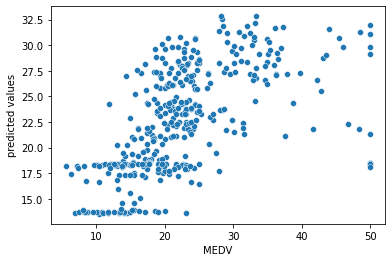

In [33]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=reg_df3, x='MEDV', y='predicted values')

<div dir='rtl'>
همانطور که مشاهده می‌شود، رگرسیون ما بهبود قابل توجهی پیدا کرد و دقت آن بهتر شد و هرچه s را بزرگ‌تر کنیم نتیجه‌ی بهتری میگیریم. اما همچنان نسبت به بخش‌های قبلی چندان عالی نیست و این روش، با توجه به نوع داده‌های ما نسبت به دو روش اول چندان مناسب نیست.
در بخش آخر برای داده‌های تست نیز به طور مشابه از پارامتر s=100 استفاده می‌کنیم.
</div>

<font size="6">Part 6</font>

In [34]:
# gathering training target values (real values) and predicted values using 3 approaches in a dataframe
training_results = pd.DataFrame()
training_results['MEDV'] = training_data['MEDV']
training_results['Approach 1'] = reg_df['predicted values']
training_results['Approach 2'] = reg_df2['predicted values']
training_results['Approach 3'] = reg_df3['predicted values']
training_results

,MEDV,Approach 1,Approach 2,Approach 3
0,24.0,29.877338,28.485827,26.476848
1,21.6,24.919740,23.086553,26.814709
2,34.7,30.104978,31.100745,26.553851
3,33.4,28.389309,32.292302,26.748170
4,36.2,27.683041,30.146528,27.203534
...,...,...,...,...
501,22.4,23.284339,21.325505,24.397172
502,20.6,22.337022,21.208721,24.325212
503,23.9,27.223279,27.617901,23.844291
504,22.0,25.788244,25.558685,23.898062


In [35]:
# calulating predicted values for testing datas using parameters calculated above and gathering them alongside target values (real values)
# predicted values = Φ.(W_ML)
testing_results = pd.DataFrame()
testing_results['MEDV'] = testing_data['MEDV']
testing_results['Approach 1'] = np.dot(get_phi_matrix1(testing_data), parameters)
testing_results['Approach 2'] = np.dot(get_phi_matrix2(testing_data), parameters2)
testing_results['Approach 3'] = np.dot(get_phi_matrix3(testing_data, s=100), parameters3)
testing_results

,MEDV,Approach 1,Approach 2,Approach 3
8,16.5,11.648735,13.037320,22.435179
20,13.6,12.928422,13.113145,20.458033
21,19.6,17.868489,16.884371,21.075515
23,14.5,14.104051,13.229196,20.499824
27,14.8,14.782675,14.418737,18.718721
...,...,...,...,...
483,21.8,21.235791,22.618787,17.377733
485,21.2,22.077986,21.867314,17.690345
486,19.1,19.662325,18.234326,18.216335
489,7.0,8.137673,13.382803,14.044385


In [36]:
# function to calculate mean square error
def calc_MSE(vector1, vector2):
    return np.linalg.norm(vector1 - vector2) ** 2 / len(vector1)

In [37]:
for i in range(1, 4):
    print(f'mean square error of approach {i} on training data: {calc_MSE(training_results["MEDV"],training_results[f"Approach {i}"])}')

mean square error of approach 1 on training data: 21.106012949581377
mean square error of approach 2 on training data: 14.510734196170693
mean square error of approach 3 on training data: 54.346287316429866


In [38]:
for i in range(1, 4):
    print(f'mean square error of approach {i} on testing data: {calc_MSE(testing_results["MEDV"],testing_results[f"Approach {i}"])}')

mean square error of approach 1 on testing data: 25.849795804600095
mean square error of approach 2 on testing data: 14.571744692061298
mean square error of approach 3 on testing data: 84.54992987678655


<div dir='rtl'>
نمودارهای مربوطه به training data را که در بالا دیدیم. حال نمودارهای مربوط به test data را نیز به طور مشابه در پایین رسم می‌کنیم (نمودارهای مربوط به هر سه روش محاسبه‌ی رگرسیون)
</div>

<div dir='rtl'>
روش اول:</div>

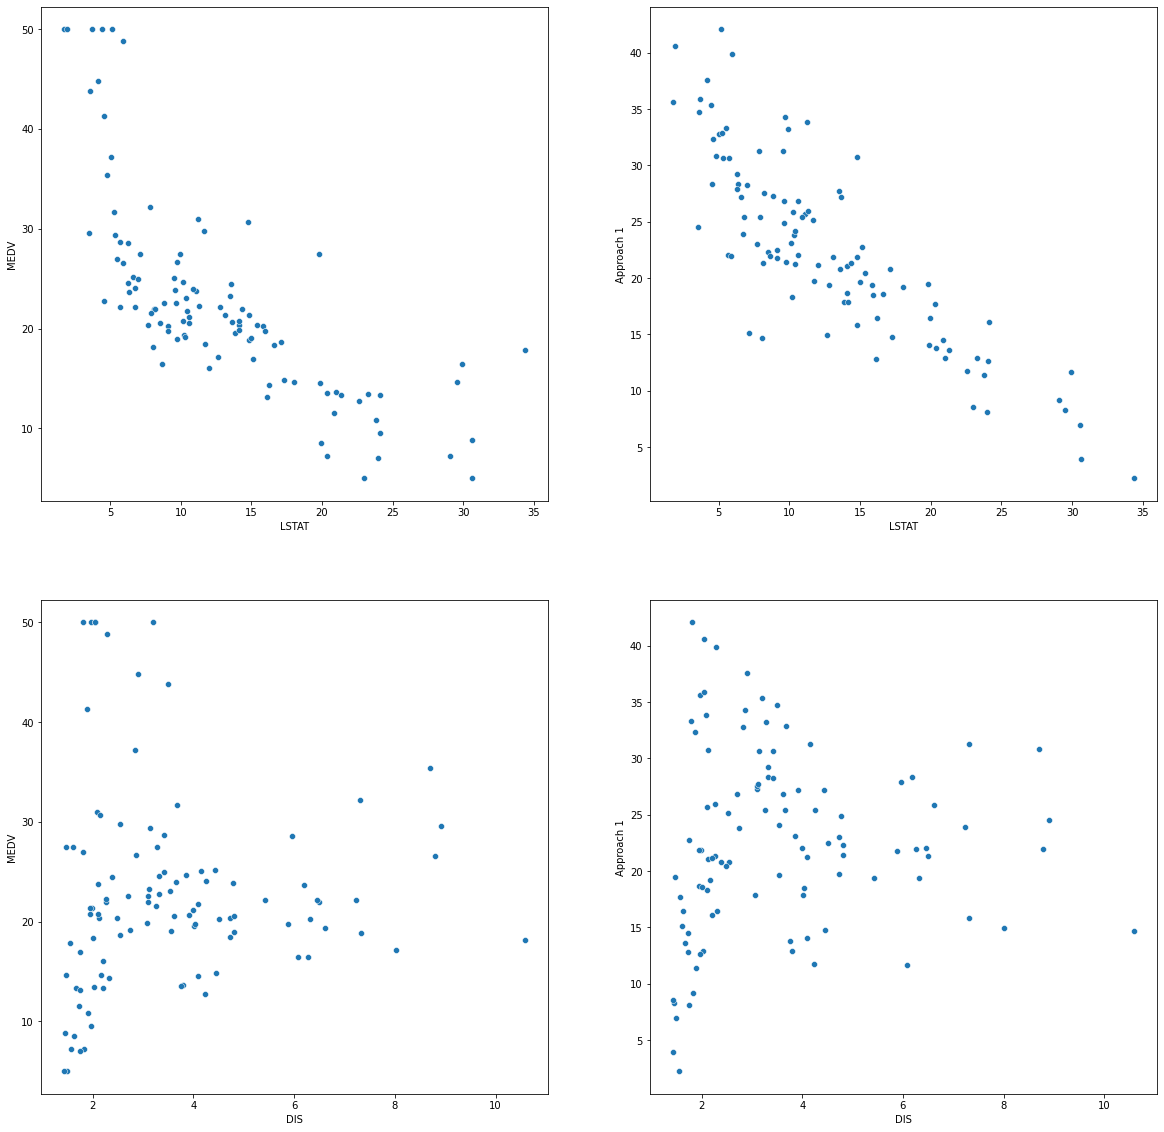

In [39]:
test_final = pd.concat([testing_data.drop(columns='MEDV'), testing_results], axis=1)
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'Approach 1'], test_final)

No handles with labels found to put in legend.


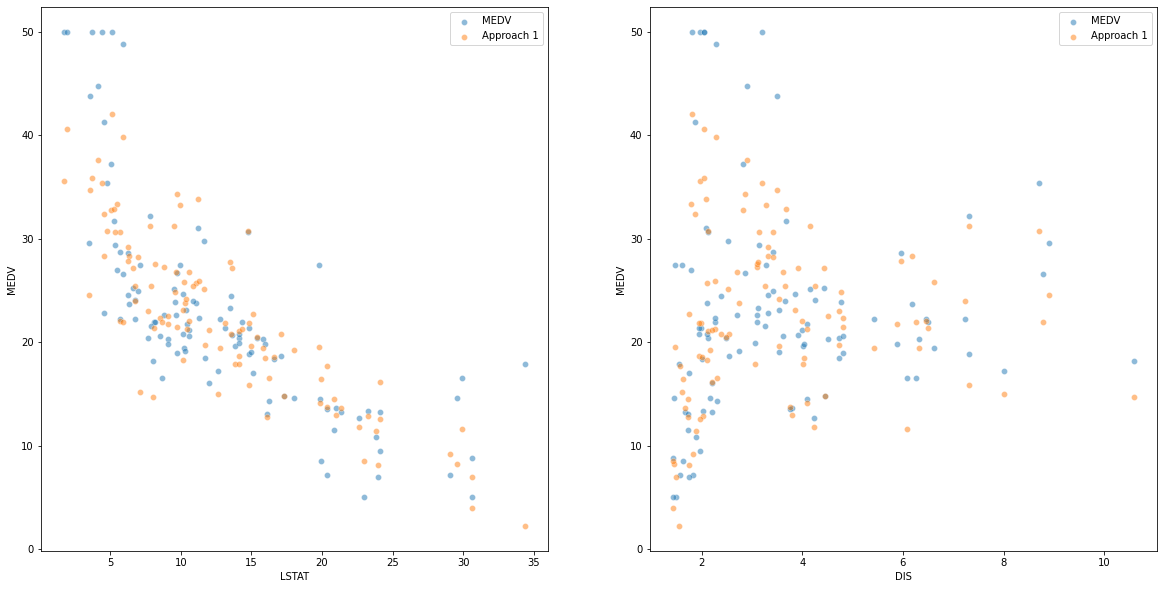

In [40]:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'Approach 1'], test_final)

<AxesSubplot:xlabel='MEDV', ylabel='Approach 1'>

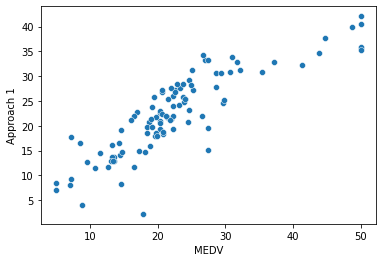

In [41]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=test_final, x='MEDV', y='Approach 1')

<div dir='rtl'>
روش دوم:</div>

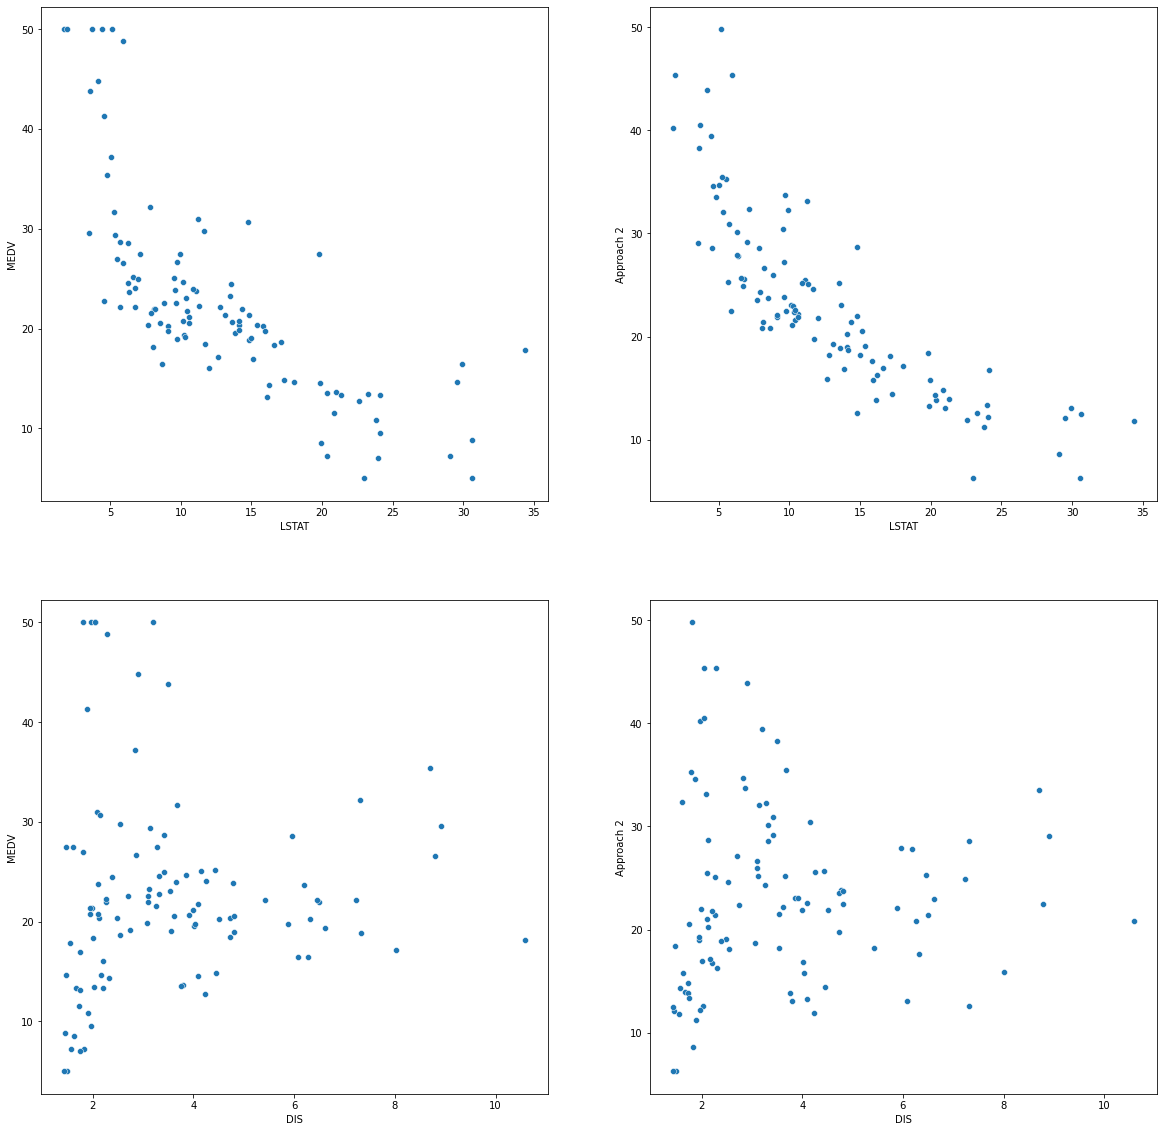

In [42]:
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'Approach 2'], test_final)

No handles with labels found to put in legend.


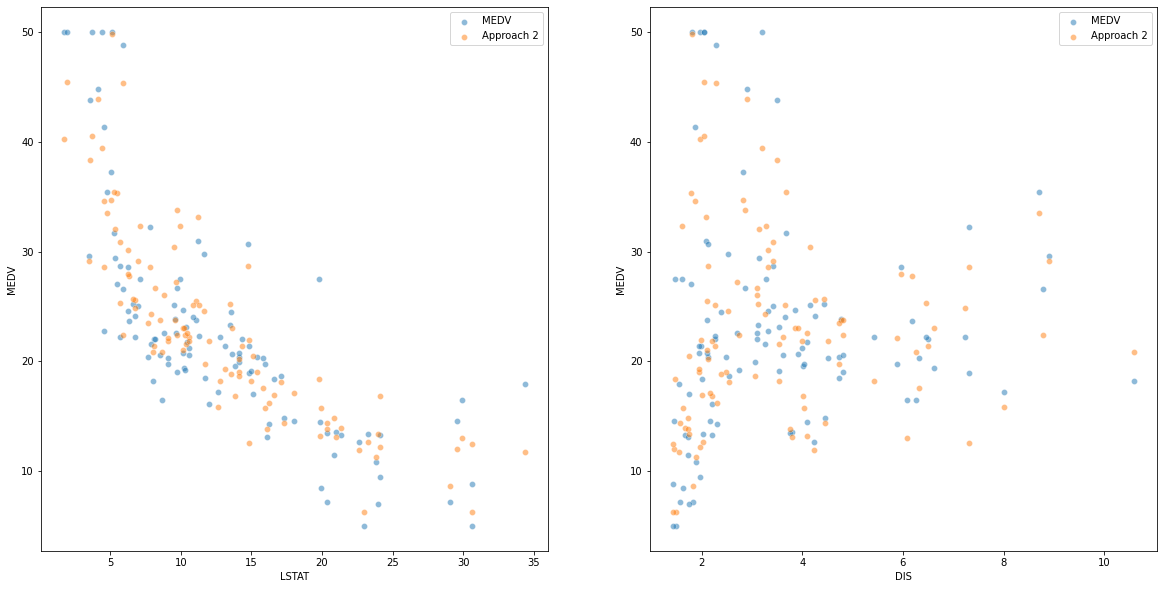

In [43]:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'Approach 2'], test_final)

<AxesSubplot:xlabel='MEDV', ylabel='Approach 2'>

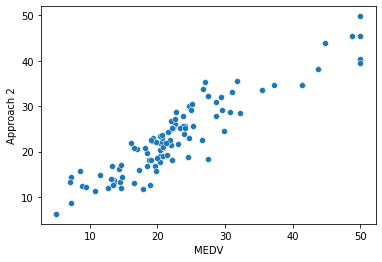

In [44]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=test_final, x='MEDV', y='Approach 2')

<div dir='rtl'>
روش سوم:
</div>

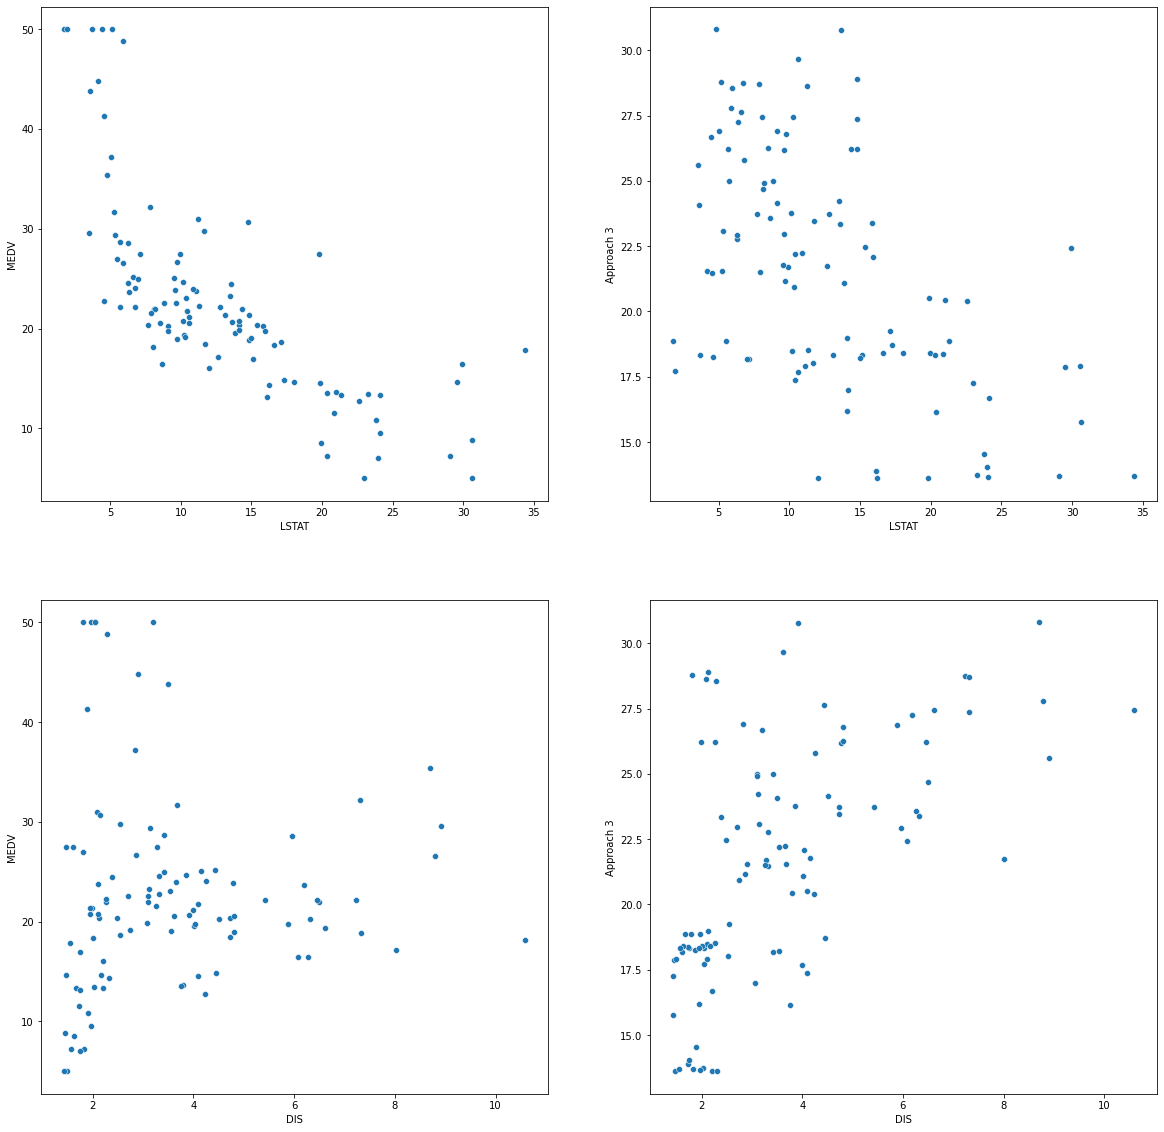

In [45]:
plot_cols_against_cols(['LSTAT', 'DIS'], ['MEDV', 'Approach 3'], test_final)

No handles with labels found to put in legend.


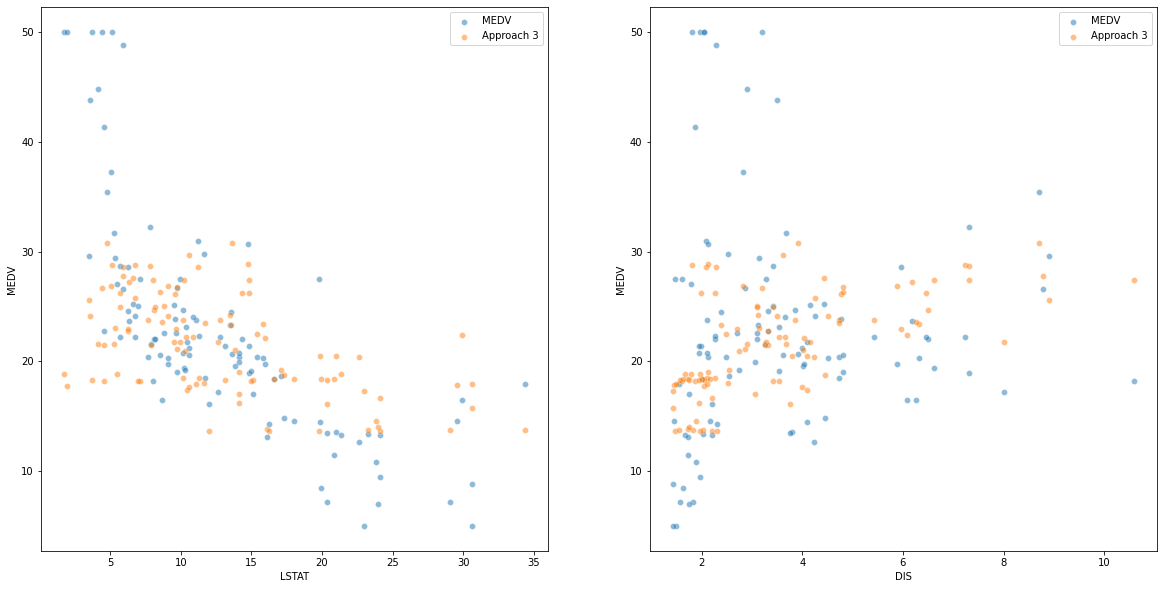

In [46]:
plot_cols_against_cols_jointly(['LSTAT', 'DIS'], ['MEDV', 'Approach 3'], test_final)

<AxesSubplot:xlabel='MEDV', ylabel='Approach 3'>

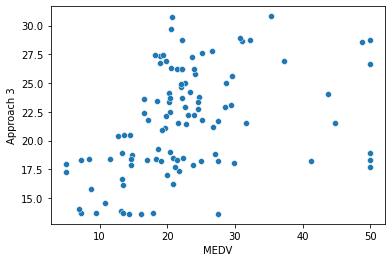

In [47]:
# plotting predicted valued based on real values (target values)
sns.scatterplot(data=test_final, x='MEDV', y='Approach 3')

<div dir='rtl'>
همانطور که به کمک مقادیر خطای MSE و نمودارها می‌توانیم ببینیم، روش دوم بهتر از دیگر روش‌ها عمل می‌کند و هم روی داده‌های train و هم روی داده‌های test خطای کمتری دارد. که البته برتری آن نسبت به روش اول پیش‌بینی میشد. زیرا روابط درجه‌ی دو بین feature ها را نیز در نظر میگیرد. هم‌چنین روش ۳ بیشترین خطا را دارد. آن هم در صورتی که از s=100 استفاده کردیم. و اگر از پارامتر s=1 استفاده می‌کردیم خطای بسیار بیشتری را متحمل می‌شدیم.
</div>